P Manohar Rao

Rollno: 197158

1.Write a python program to implement Logistic Regression for multiclass classification from scratch using the following dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:

data = pd.read_csv('/Iris.csv')
data = data.sample(frac=1)
data = data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
35,5.0,3.2,1.2,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


replacing the string vales with numeric values

In [9]:
data=np.array(data) 
X=data[:,:-1]
Y=data[:,-1]
y_unique=np.unique(Y)
print(y_unique)
for i in range (len(Y)):
  Y[i]=list(y_unique).index(Y[i])
Y=Y.astype('int32')
print(Y.dtype)
Y

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
int32


array([0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       2, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2,
       2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1], dtype=int32)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=preprocessing.scale(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 69)

In [11]:
def one_hot(y,unique):
    y_hot = np.zeros((len(y), unique))
    y_hot[np.arange(len(y)), y] = 1
    # print(y_hot)
    return y_hot

defining the softmax function for multiclass classification

In [13]:
def softmax(z):
    exp = np.exp(z - np.max(z))
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    return exp

In [12]:
def gradients(X, y, y_hat):
    m = X.shape[0]
    # Gradient w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    # Gradient w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))
    return dw, db


In [14]:
def train(X, y, epochs, unique, alpha):
    m, n = X.shape
    w = np.zeros((n, unique))
    b = 0
    losses = []
    # running iterations
    for epoch in range(epochs):
        z = np.dot(X, w)+b
        y_hat = softmax(z)
        y_hot = one_hot(y, unique)
        dw, db = gradients(X, y_hot, y_hat)
        w -= alpha*dw
        b -= alpha*db
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)
    plt.plot(np.arange(1, epochs), losses[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    return w, b


In [15]:
def predict(X, w, b):
    z = np.dot(X,w) + b
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1)

3
int32


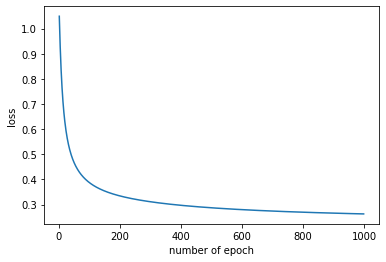

In [16]:
# training
unique=len(y_unique)
print(unique)
print(y_train.dtype)
w,b=train(x_train,y_train,1000,unique,0.05)

In [17]:
y_pred=predict(x_test,w,b)
print(y_pred)
print(y_test)

[2 1 2 1 0 0 2 2 0 0 1 0 2 2 0 2 2 2 2 2 2 2 1 0 2 2 0 1 0 2]
[2 1 2 1 0 0 2 1 0 0 2 0 2 2 0 2 1 2 1 1 2 2 1 0 1 1 0 1 0 1]


calculating the accuracy

In [18]:
count=0
correct=0
for i in range(np.size(y_pred)):
  if(y_test[i]==y_pred[i]):
    correct+=1
  count+=1
accuracy=correct/count
print("Accuracy: ",accuracy*100)

Accuracy:  73.33333333333333


-----------------------------------------

2.Write a python program to implement Support Vector Machines (SVM) for Linear and Polynomial kernel from scratch using the following dataset.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
data = pd.read_csv('/Iris.csv')
data=data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data=np.array(data) 
X=data[:100,:-1]
Y=data[:100,-1]
y_unique=np.unique(Y)
print(y_unique)
for i in range (len(Y)):
  Y[i]=list(y_unique).index(Y[i])
Y=Y.astype('int32')
Y=np.array(Y)
Y=np.where(Y<=0,-1,1)
from sklearn import preprocessing
X=preprocessing.scale(X)
print(np.shape(X))

['Iris-setosa' 'Iris-versicolor']
(100, 4)


In [23]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=69)

In [24]:

def train(X,y,epochs,alpha,l):
  m,n=X.shape
  w=np.zeros(n)
  b=0
  for _ in range(epochs):
    for i,x in enumerate(X):
      condition=y[i]*(np.dot(x,w)-b)>=1
      if condition:
        w-=alpha*(2*l*w)
      else:
        w-=alpha*(2*l*w-np.dot(x,y[i]))
        b=alpha*y[i]
  return w,b




In [25]:
def predict(X,w,b):
  y_pred=np.dot(X,w)-b
  return np.sign(y_pred)
  

In [26]:

w,b=train(x_train,y_train,1000,0.1,0.001)

In [27]:

y_pred=predict(x_test,w,b)
print(y_pred)
print(y_test)

[ 1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.
  1.  1.]
[ 1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1]


calculating the accuracy

In [28]:

cnt=0
correct=0
for i in range(np.size(y_pred)):
  if(y_test[i]==y_pred[i]):
    correct+=1
  cnt+=1
accuracy=correct/cnt
print("Accuracy: ",accuracy*100)

Accuracy:  100.0
